## Project Details
**`Tasks in this project are as follows:`**

**Data wrangling**, which consists of:
>**Gathering data** ,
>**Assessing data**,
>**Cleaning data**

Storing, analyzing, and visualizing wrangled data
Reporting on 1) data wrangling efforts and 2) data analyses and visualizations

## Data Gathering

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy 
from tweepy import OAuthHandler
import json 
from timeit import default_timer as timer
import matplotlib.pyplot as plt

`Loading data in dataframe`

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
347,831911600680497154,NaN,NaN,2017-02-15 17:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu,None,None,None,None
1243,711968124745228288,NaN,NaN,2016-03-21 17:30:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's trapped in a cup of coffee....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711968124...,10,10,Winston,None,None,pupper,None


### Downloading 'image_prediction.tsv' using the Requests library from the URL

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb') as file:
    file.write(response.content)
df_image = pd.read_csv('image_prediction.tsv',delimiter='\t')

In [4]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Downloading data from twitter API using Tweepy library

In [5]:
consumer_key = 'Consumer Key'
consumer_secret = 'Consumer Secret'
access_token = 'Access Token'
access_secret = 'Access Secret'

In [6]:
# Creating Variable
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a') as f:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

`Creating a copy of dataset before performing any changes`

In [8]:
df_copy = df.copy()
df_copy.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1592,686394059078897668,NaN,NaN,2016-01-11 03:47:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,NaN,NaN,NaN,https://vine.co/v/iMqBebnOvav,12,10,None,None,None,None,None
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,None,None,None


`Checking the size of dataset`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
print('tweet_id : ',type(df['tweet_id'][0]))
print('in_reply_to_status_id  :',type(df['in_reply_to_status_id'][0]))
print('in_reply_to_user_id  :',type(df['in_reply_to_user_id'][0]))
print('timestamp : ',type(df['timestamp'][0]))
print('source :',type(df['source'][0]))
print('text :',type(df['text'][0]))
print('retweeted_status_id : ',type(df['retweeted_status_id'][0]))
print('retweeted_status_user_id: ',type(df['retweeted_status_user_id'][0]))
print('retweeted_status_timestamp :',type(df['retweeted_status_timestamp'][0]))
print('expanded_urls : ',type(df['expanded_urls'][0]))
print('rating_numerator : ',type(df['rating_numerator'][0]))
print('rating_denominator : ',type(df['rating_denominator'][0]))
print('name :',type(df['name'][0]))
print('doggo : ',type(df['doggo'][0]))
print('floofer',type(df['floofer'][0]))
print('pupper',type(df['pupper'][0]))
print('puppo',type(df['puppo'][0]))

tweet_id :  <class 'numpy.int64'>
in_reply_to_status_id  : <class 'numpy.float64'>
in_reply_to_user_id  : <class 'numpy.float64'>
timestamp :  <class 'str'>
source : <class 'str'>
text : <class 'str'>
retweeted_status_id :  <class 'numpy.float64'>
retweeted_status_user_id:  <class 'numpy.float64'>
retweeted_status_timestamp : <class 'float'>
expanded_urls :  <class 'str'>
rating_numerator :  <class 'numpy.int64'>
rating_denominator :  <class 'numpy.int64'>
name : <class 'str'>
doggo :  <class 'str'>
floofer <class 'str'>
pupper <class 'str'>
puppo <class 'str'>


**`Tidiness Issues`**
1. The columns 'doggo', 'floofer', 'pupper','puppo' should be one variable in dataset df
2. The columns 'rating_numerator' and 'rating_denominator' could be part of one variable  

**`Quality Issues`**
1. 'timestamp' does not have correct data type
2. Null in doggo , floofer , pupper and puppo is represented with None
3. Some 'names' are None instead of Null
4. Rating numerator is greater than the denominator
5. 'rating_denominator' has value other than 10 also
6. text column has encoded data ,eg '&amp' for tweet_id = 758854675097526272
7. Some records donot have stage specified , for eg tweet_id = 758854675097526272
8. Some records have url and ranking mentioned in text column itself , for eg tweet_id 696886256886657024 and 715704790270025728
9. The source of some records are other than tweeter , for eg tweet_id=696886256886657024 or 715704790270025728
10. Retweet information is also present in dataframe of twitter-archive-enhanced.csv
11. 'rating_denominator' has value zero

In [12]:
df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Data Cleaning

`Dataframe df of twitter-archive-enhanced.csv has re-tweet information and hence we will remove it`

In [13]:
#df dataframe of twitter-archive-enhanced.csv has re-tweet information and hence we will remove it:
df_re_tweet = pd.DataFrame()
df_re_tweet = df.loc[df.retweeted_status_id.notnull()]
df_re_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [14]:
#Removing retweet rows
print('Shape Before', df.shape)
df.drop(df_re_tweet.index,inplace=True)
print('Shape After', df.shape)

Shape Before (2356, 17)
Shape After (2175, 17)


In [15]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2078,670832455012716544,NaN,NaN,2015-11-29 05:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amy. She is Queen Starburst. 10/10 une...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670832455...,10,10,Amy,None,None,None,None
1973,673213039743795200,NaN,NaN,2015-12-05 18:51:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He just got some big news. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673213039...,10,10,Dexter,None,None,None,None
1883,674805413498527744,NaN,NaN,2015-12-10 04:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your entire life is crumbling before you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674805413...,10,10,None,None,None,None,None
2165,669367896104181761,NaN,NaN,2015-11-25 04:11:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. Chip's pretending to be choked. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669367896...,10,10,Chip,None,None,None,None
842,766793450729734144,NaN,NaN,2016-08-20 00:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rufus. He just missed out on the 100m ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,None,None,None,None


In [16]:
#After deleting records having retweet information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [17]:
# Removing columns of retweet
df.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


In [18]:
#After deleting columns having retweet details
df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1271,709409458133323776,NaN,NaN,2016-03-14 16:02:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,None,None,None,None
708,785264754247995392,NaN,NaN,2016-10-09 23:44:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,https://twitter.com/dog_rates/status/785264754...,12,10,Doc,None,None,None,None


In [19]:
# Checking different numerator values
df['rating_numerator'].value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
#Checking different denominator values
df['rating_denominator'].value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

`From the above cell we can see that there is a denominator with value zero , we will find it and remove it`

In [21]:
# Looking for row having 0 denominator
df.loc[df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None


In [22]:
# Removing the row with zero denominator
df.drop(df[df['rating_denominator']==0].index,inplace=True)

In [23]:
# Checking that 0 denominator row is removed
df.loc[df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`Creating a new column to store the stage of dogs`

In [24]:
# creating dogStage column
df['dogStage'] = df['text'].str.extract('(doggo|floofer|puppo|pupper)', expand=True)
df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogStage
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,NaN


In [25]:
# dropping doggo floofer puppo and pupper columns
df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],inplace=True)
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


In [26]:
# Change missing values in name from None to NaN
df['name']=df['name'].replace('None',np.NaN)
df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage
2088,670792680469889025,NaN,NaN,2015-11-29 02:33:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Antony. He's a Sheraton Tetrahedron. S...,https://twitter.com/dog_rates/status/670792680...,7,10,Antony,NaN
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,NaN
1804,676946864479084545,NaN,NaN,2015-12-16 02:08:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pups goal was to get all four feet as clo...,https://twitter.com/dog_rates/status/676946864...,12,10,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2174 non-null object
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2117 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     1495 non-null object
dogStage                 364 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.8+ KB


`Converting data type of timestamp`

In [28]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2117 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     1495 non-null object
dogStage                 364 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.8+ KB


`Storing the clean DataFrame in a CSV file with the name twitter_archive_master.csv`

In [29]:
df.to_csv('twitter_archive_master.csv')

## Visualization

Text(0.5,0,'Dog Names')

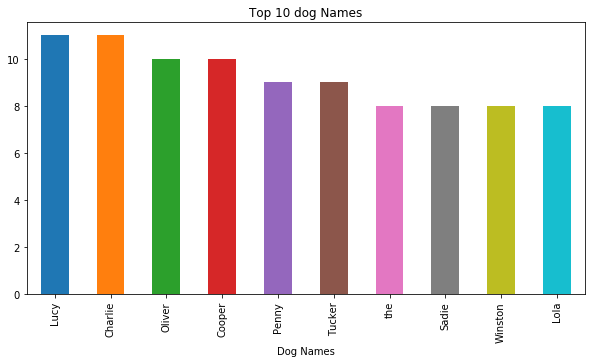

In [30]:
# Plotting by top 10 common dog names
df.name.value_counts()[1:11].plot(kind='bar',title='Top 10 dog Names',figsize=(10,5)).set_xlabel('Dog Names')

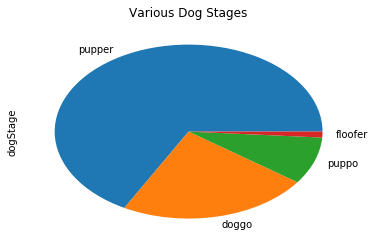

In [31]:
# Plotting Dog Stage
df.dogStage.value_counts().plot(kind='pie',title='Various Dog Stages');

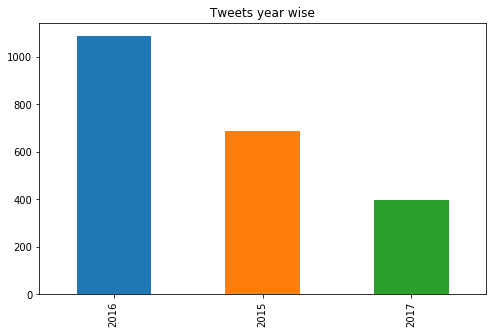

In [32]:
# Plotting tweet trend
(df['timestamp'].dt.year).value_counts().plot(kind='bar',title='Tweets year wise',figsize=(8,5))

### Insights

1. Pupper Stage has the most number of dogs
2. lucy is the most popular dog name
3. Year 2016 has the highest number of tweets for dogs 